In [2]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
max_c = 3e-4

In [3]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
t = np.arange(0,1000,0.1)
K = 3.9
sum_time = 1000
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
# theta = theta[::10]
# dtheta = dtheta[::10]
# t = t[::10]
# rs = rs[::10]
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)
multi = 1.5

[]

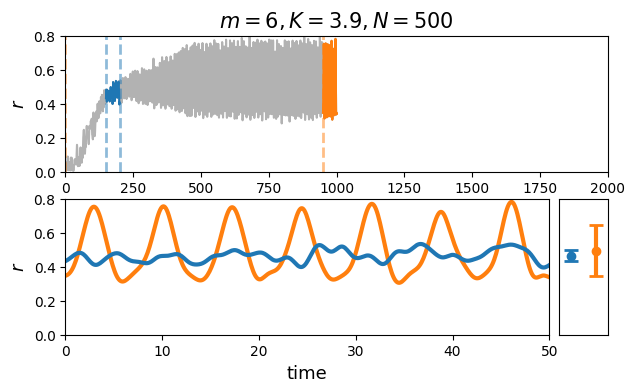

In [4]:
fig = plt.figure(figsize=(7,6))
# fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,5))
ax1 = fig.add_subplot(311)
plt.sca(ax1)
plt.plot(t,rs,color ='k',alpha=0.3)
plt.plot(t[-500:],rs[-500:],color = 'tab:orange')
plt.plot(t[1500:2000],rs[1500:2000],color = 'tab:blue')
plt.axvline(t[1500],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')
plt.axvline(t[2000],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')

plt.axvline(t[-500],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.axvline(t[0],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.ylim(0,0.8)
plt.xlim(0,2000)

plt.ylabel(r'$r$',fontsize=13)
ax1.set_xlabel(r'time',fontsize=13)
plt.title(r'$m=6,K=3.9,N=500$',fontsize=15)

ax2 = fig.add_subplot(312)
plt.sca(ax2)
plt.ylabel(r'$r$',fontsize=13)
plt.xlabel(r'time',fontsize=13)

plt.xlim(0,50)
plt.plot(t[0:500],rs[-500:],color = 'tab:orange',lw=3)
plt.plot(t[0:500],rs[1500:2000],color = 'tab:blue',lw=3)

plt.ylim(0,0.8)


div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="10%", pad=0.1)
plt.sca(cax)

mean_r = np.mean(rs[-500:])
std_r = np.std(rs[-500:])


mean_r2 = np.mean(rs[1500:2000])
std_r2 = np.std(rs[1500:2000])
plt.setp(ax2.get_yticklabels(), visible=True)
plt.errorbar(0.1,mean_r,std_r,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:orange')
plt.errorbar(-0.1,mean_r2,std_r2,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:blue',zorder=3)
cax.set_ylim(0,0.8)
cax.set_xlim(-0.2,0.2)
cax.set_yticks([])
cax.set_xticks([])
# cax.set_title(r'$\bar{r}$ & $r(t)$ std.')


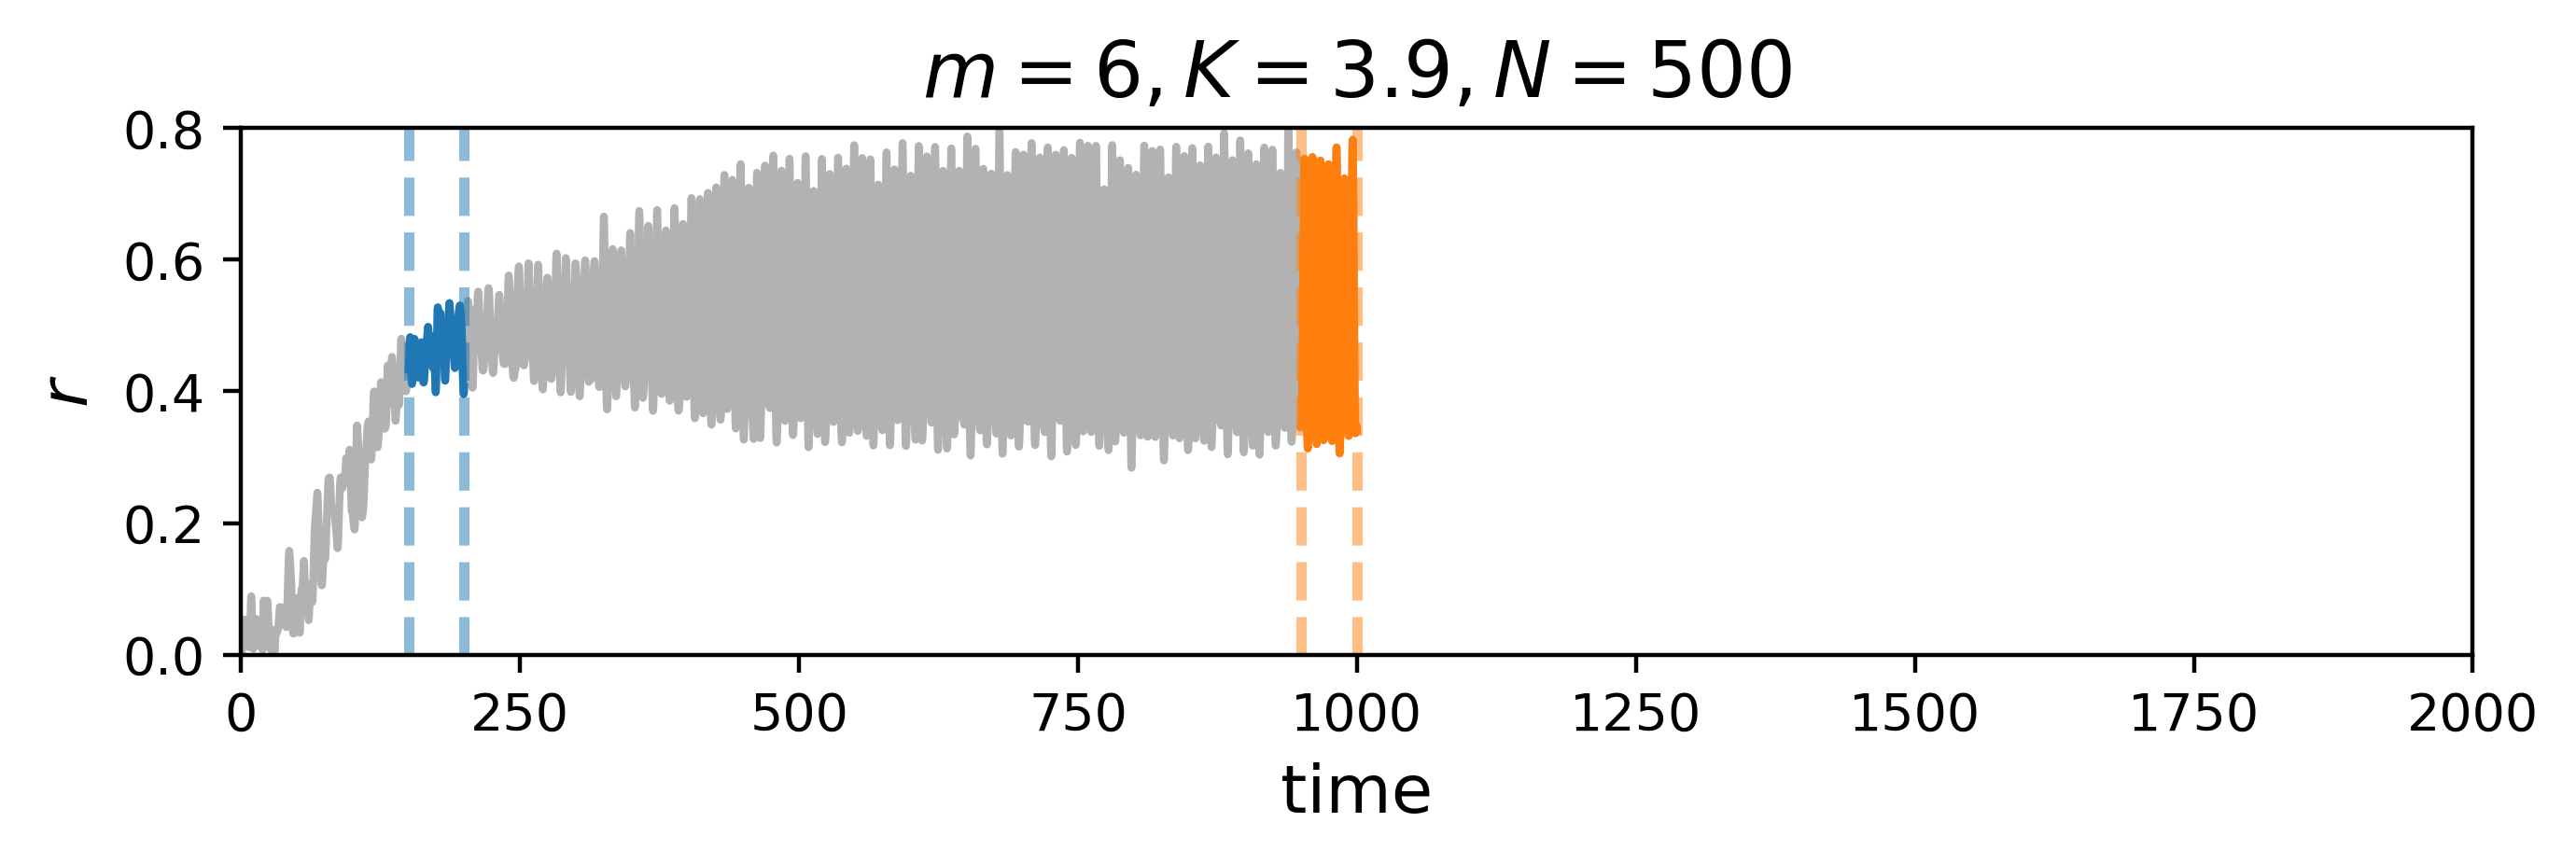

In [5]:
fig = plt.figure(figsize=(7,6),dpi=400)

ax1 = fig.add_subplot(311)
plt.sca(ax1)
plt.plot(t,rs,color ='k',alpha=0.3)
plt.plot(t[-500:],rs[-500:],color = 'tab:orange')
plt.plot(t[1500:2000],rs[1500:2000],color = 'tab:blue')
plt.axvline(t[1500],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')
plt.axvline(t[2000],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')

plt.axvline(t[-500],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.axvline(t[-1],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.ylim(0,0.8)
plt.xlim(0,2000)

plt.ylabel(r'$r$',fontsize=13)
plt.xlabel(r'time',fontsize=13)
plt.title(r'$m=6,K=3.9,N=500$',fontsize=15)
plt.tight_layout()

[]

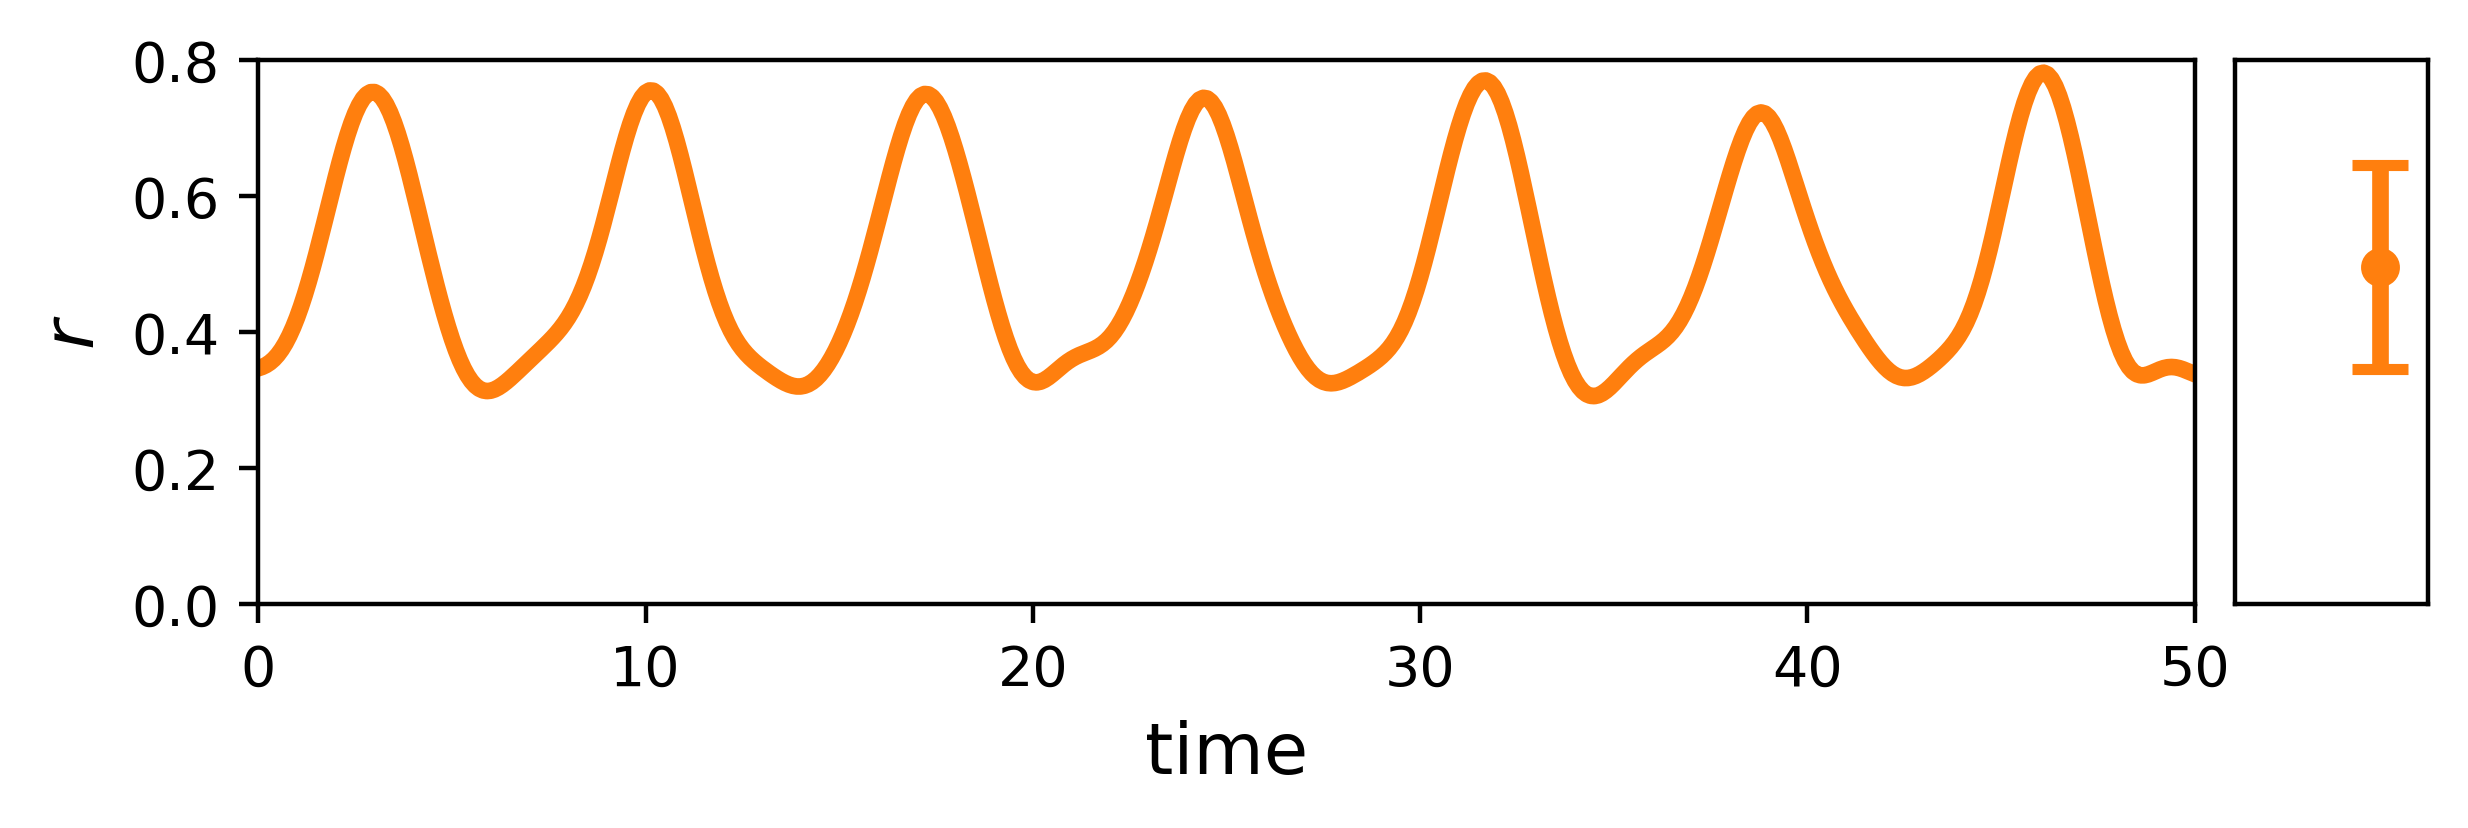

In [6]:
fig = plt.figure(figsize=(7,6),dpi=400)
# fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,5))
ax2 = fig.add_subplot(311)
plt.sca(ax2)
plt.ylabel(r'$r$',fontsize=13)
plt.xlabel(r'time',fontsize=13)

plt.xlim(0,50)
plt.plot(t[0:500],rs[-500:],color = 'tab:orange',lw=3)
# plt.plot(t[0:500],rs[1500:2000],color = 'tab:blue',lw=3)

plt.ylim(0,0.8)


div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="10%", pad=0.1)
plt.sca(cax)

mean_r = np.mean(rs[-500:])
std_r = np.std(rs[-500:])


mean_r2 = np.mean(rs[1500:2000])
std_r2 = np.std(rs[1500:2000])
plt.setp(ax2.get_yticklabels(), visible=True)
# plt.errorbar(-0.1,mean_r2,std_r2,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:blue',zorder=3)
plt.errorbar(0.1,mean_r,std_r,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:orange')
cax.set_ylim(0,0.8)
cax.set_xlim(-0.2,0.2)
cax.set_yticks([])
cax.set_xticks([])
# cax.set_title(r'$\bar{r}$ & $r(t)$ std.')
# plt.tight_layout()


In [19]:
avg_dtheta

array([[-3.23491444, -3.01117639, -2.42400655, ...,  2.42815889,
         2.44084094,  2.64945574],
       [-3.23491395, -3.01113349, -2.42395351, ...,  2.42813391,
         2.44091456,  2.64945761],
       [-3.23490057, -3.01108794, -2.42390192, ...,  2.42809684,
         2.44099268,  2.64944552],
       ...,
       [-3.23430045, -3.00907352, -2.42378287, ...,  2.42764323,
         2.42743287,  2.64590436],
       [-3.23423519, -3.00909117, -2.42368147, ...,  2.42757616,
         2.4273164 ,  2.64587461],
       [-3.23413146, -3.00911112, -2.42354517, ...,  2.42746537,
         2.42716252,  2.64584017]])

In [20]:
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(AVG=avg_dtheta[-500:],check=1e-4,c_size=5,N=N,omega=omega)
dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
dtype2 = [('cluster size', int), ('cluster mean natural frequency', float)]
CSMP = np.array([(S,P) for S,P in zip(CS,CMP)],dtype=dtype)
CSMO = np.array([(S,O) for S,O in zip(CS,CMO)],dtype=dtype2)

In [21]:
CSMP

array([(283,  0.06623343), ( 70, -0.80948495), ( 56,  0.94315072)],
      dtype=[('cluster size', '<i8'), ('cluster mean phase velocity', '<f8')])

In [22]:
import matplotlib.colors as mcl


In [23]:
c0 = cluster[0]
c1 = cluster[1]
c2 = cluster[2]

In [24]:
CLU = np.concatenate([c0,c1,c2])
not_CLU = np.setdiff1d(np.arange(N),CLU)


In [25]:
rpsi = 1/N * np.sum(np.exp(1j*theta),axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
n_dtheta = dtheta / np.max(abs(dtheta))
def time_oscillator(i):
    norm = n_dtheta[i]
    A = (1 + (norm)/2)
    theta_ = theta[i] - psi[i]
    sin,cos = A*np.sin(theta_+np.pi/2), A*np.cos(theta_+np.pi/2)
    
    return cos,sin,norm,np.cos(theta_+np.pi/2),np.sin(theta_+np.pi/2)

In [26]:
c_ = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(c_),'y':np.sin(c_)
}

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_81766/1071560760.py:52: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_81766/1071560760.py:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=col

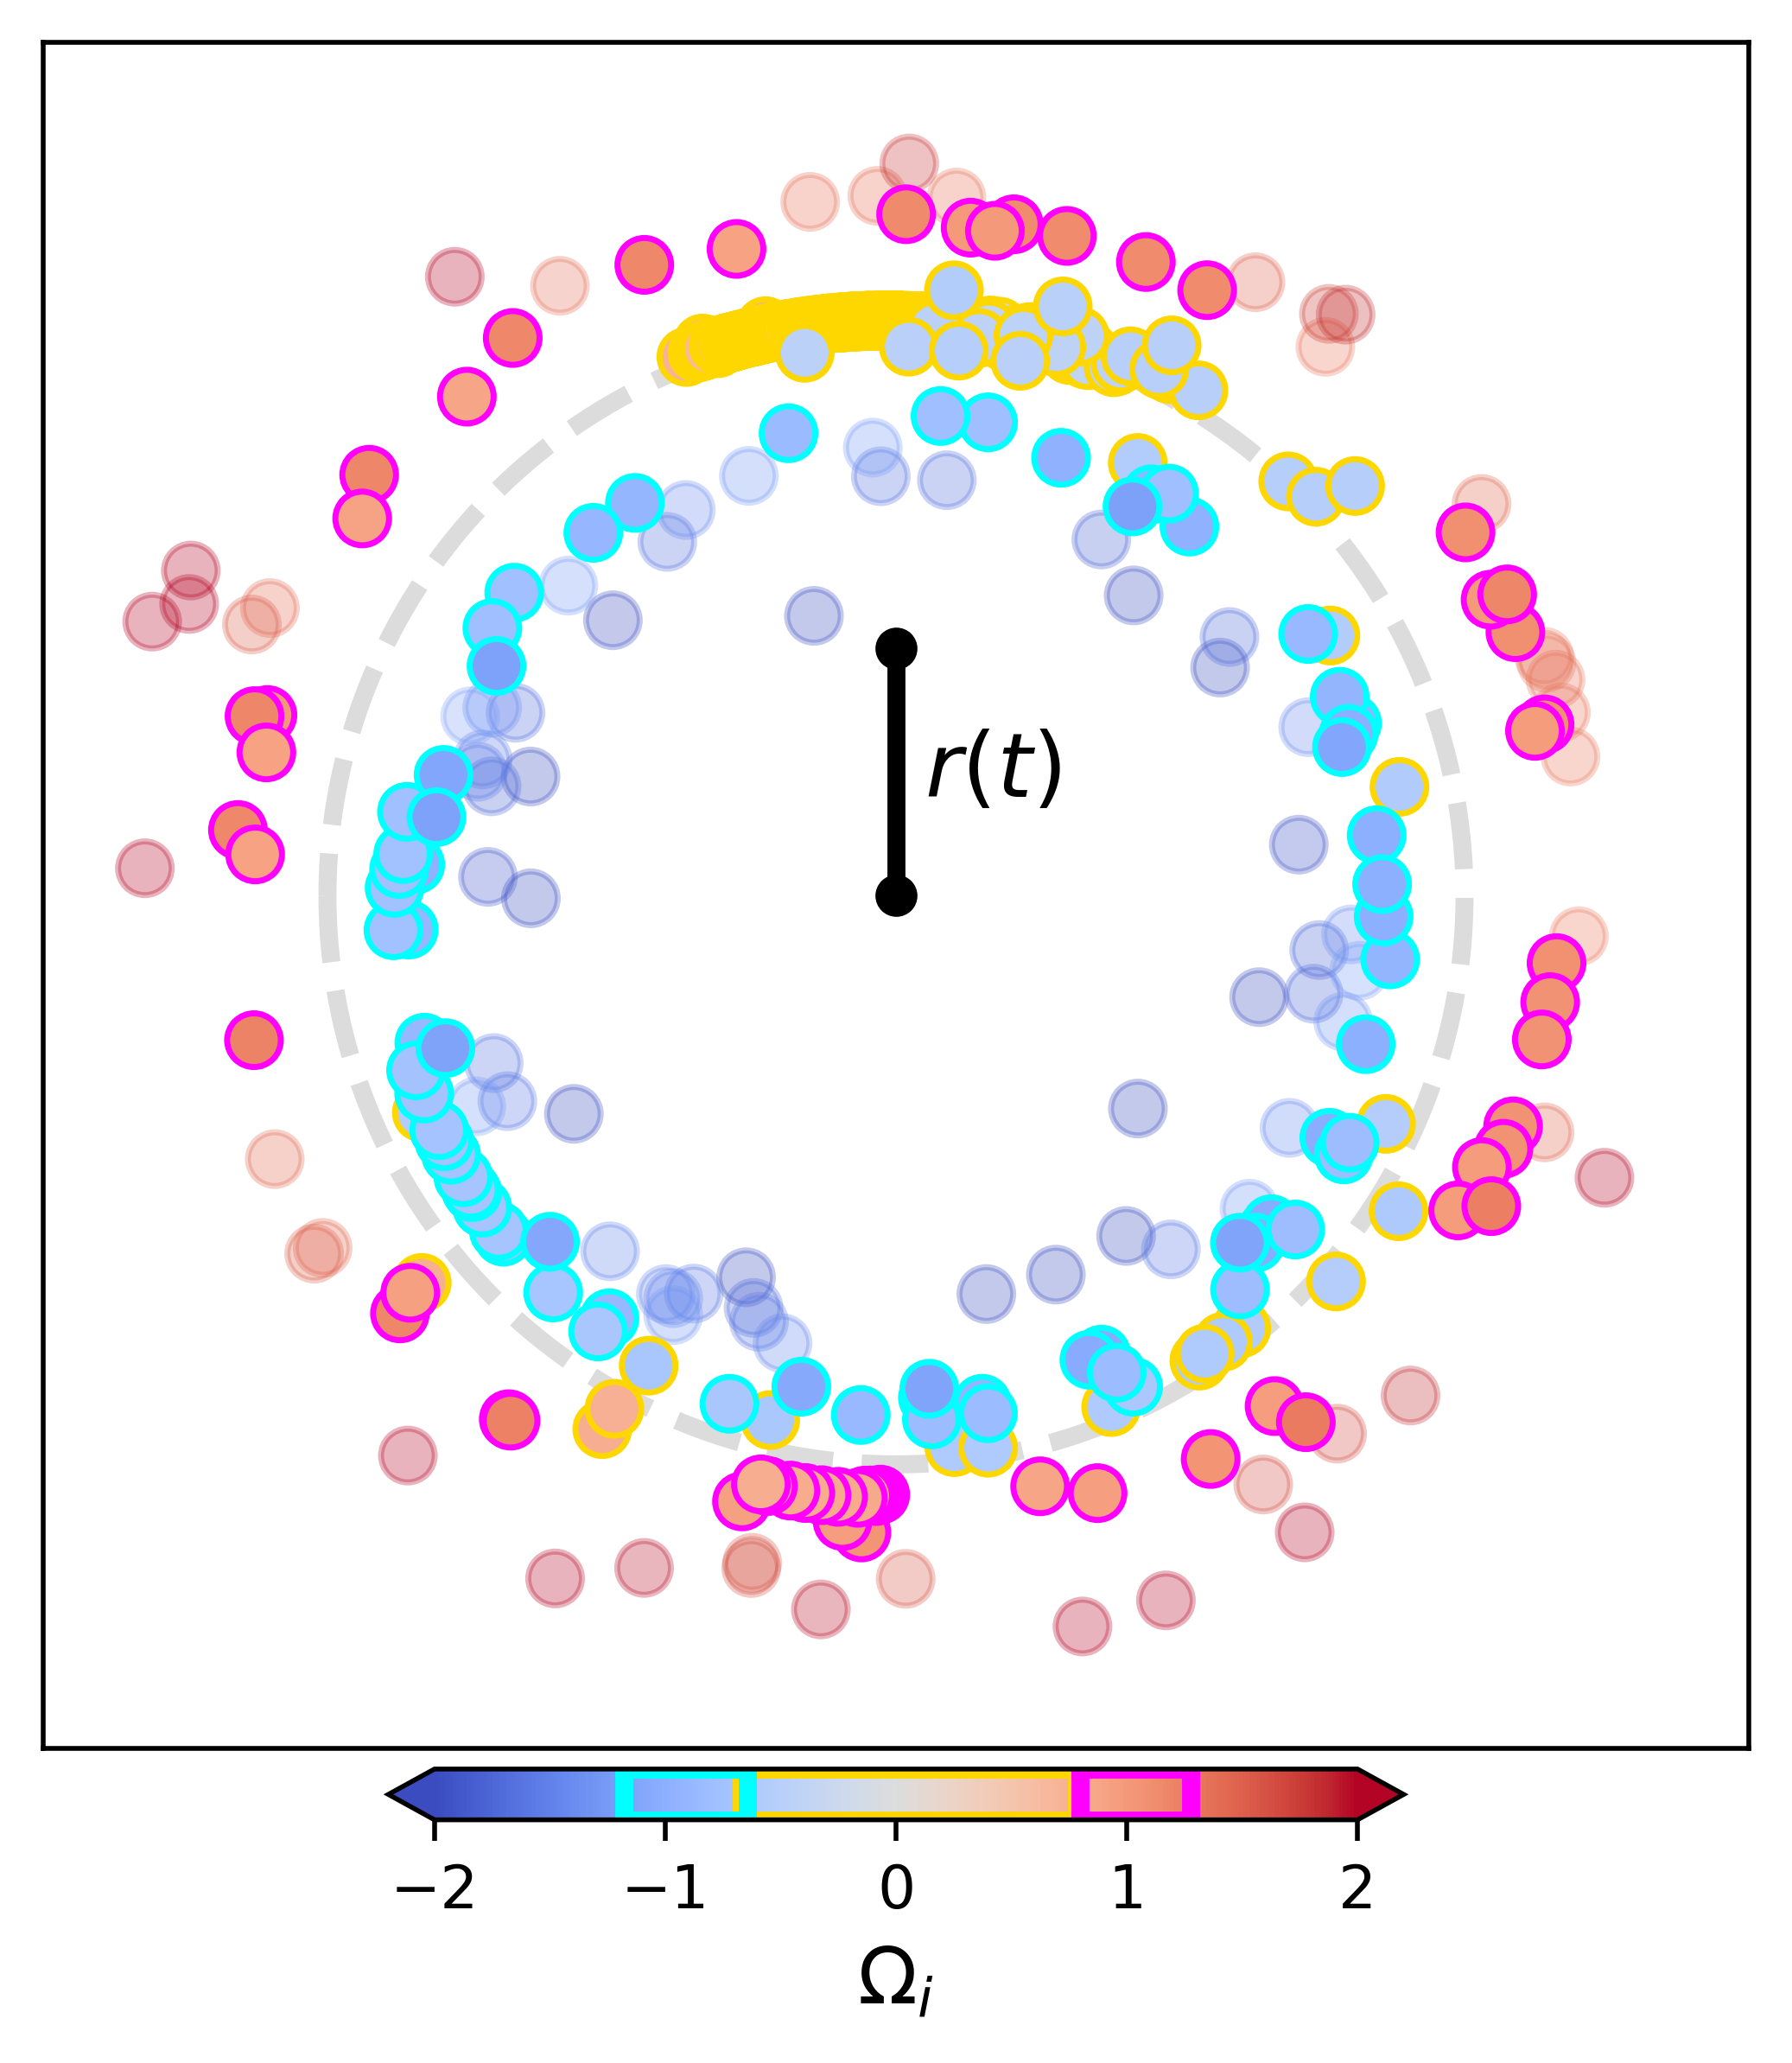

In [27]:
i = 1500
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))

# colors = ['gold','darkslateblue','darkred']
colors = ['gold','aqua','fuchsia']

X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r(t)$',horizontalalignment='left', verticalalignment='center',fontsize=15)
cmap = 'coolwarm'#'Spectral'#'viridis'#
s = 100
data = {
    'x': X[not_CLU],'y':Y[not_CLU],
    'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
    'cmap':cmap,
    # 'c': colors,#ome"ga,'cmap':'YlOrRd',
}
cax_ = ax.scatter(**data,zorder=1)
alpha = 1
alpha_text = f'{round(alpha*255):02x}'
for clu,color in zip([c0,c1,c2],colors):
    if len(clu)!=0:
        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)


ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
plt.gca().set_aspect('equal')
cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
# cbar.ax.plot([0,1],[1]*2,'w')
# for clu,color in zip([c0,c1,c2],colors):
for clu,color in zip([c0,c1,c2],colors):

    if len(clu)!=0:
        min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
        cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.353))
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_81766/697512277.py:90: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_81766/697512277.py:91: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=color

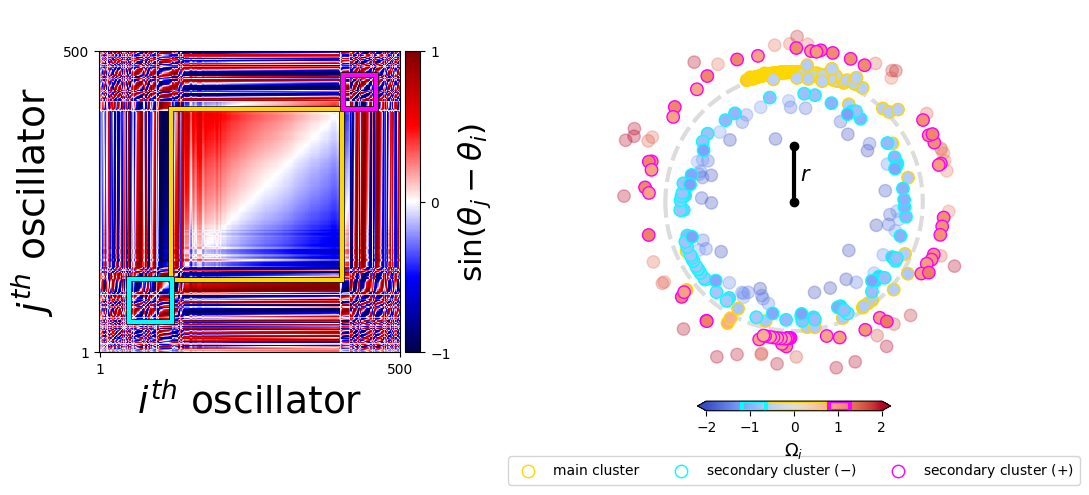

In [29]:
from itertools import combinations,permutations
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, (ax_sin, ax) = plt.subplots(ncols=2, nrows=1, figsize=(11, 6),dpi=100,facecolor=(1,1,1,0),width_ratios=[5,6])
multi_ = 1.5



i = 1500
index = i
s = 800
cmap = 'bwr'
# colors = ['gold','darkslateblue','darkred']
# colors = ['gold','aqua','fuchsia']
colors = ['gold','aqua','fuchsia','lawngreen','orangered']

RECs = []
plt.sca(ax_sin)
I,J = np.meshgrid(theta[i],theta[i])
im = plt.imshow(np.sin(J-I),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
plt.xticks([1,500])
plt.yticks([1,500])
plt.xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
plt.ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)

for clu,color in zip([c0,c1,c2],colors):
    if len(clu)!=0:

        min_c,max_c = np.max(clu),np.min(clu)
        Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=4)
        Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=3)
        RECs.append((Rec_,Rec))
        plt.gca().add_patch(Rec_)
        plt.gca().add_patch(Rec)
# plt.title(f'K = {Ks[K_idx]}',fontsize=18*multi_)
div = make_axes_locatable(ax_sin)
cax = div.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_ticks([-1,0,1])
cbar.set_label(r'$\sin(\theta_j-\theta_i)$',fontsize=15*multi_)
############################ rotator graph ####################

plt.sca(ax)
# colors = ['gold','darkslateblue','darkred']
X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
cmap = 'coolwarm'#'Spectral'#'viridis'#
s = 100
data = {
    'x': X[not_CLU],'y':Y[not_CLU],
    'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
    'cmap':cmap,
    # 'c': colors,#omega,'cmap':'YlOrRd',
}
cax_ = ax.scatter(**data,zorder=1)
alpha = 1
alpha_text = f'{round(alpha*255):02x}'
for clu,color in zip([c0,c1,c2],colors):
    if len(clu)!=0:

        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)


ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
ax.set_aspect('equal')
cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
# cbar.ax.plot([0,1],[1]*2,'w')
for clu,color in zip([c0,c1,c2],colors):
    if len(clu)!=0:

        min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
        cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.25),ncols=3)
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')
ax.set_facecolor((1,1,1,0))
ax.set_aspect('equal')
for _ in range(100):fig.tight_layout()


# ax = plt.gca()

In [30]:
fig.set_facecolor('white')
def ANI2(A_idx):
    i = A_idx
    index = i
    s = 800
    cmap = 'bwr'
    # colors = ['gold','darkslateblue','darkred']
    colors = ['gold','aqua','fuchsia']

    RECs = []
    ax_sin.clear()
    # plt.sca(ax_sin)
    I,J = np.meshgrid(theta[i],theta[i])
    im = ax_sin.imshow(np.sin(J-I),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
    ax_sin.set_xticks([1,500])
    ax_sin.set_yticks([1,500])
    ax_sin.set_xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
    ax_sin.set_ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)

    # for clu,color in zip([c0,c1,c2],colors):
    for clu,color in zip([c0,c1,c2],colors):

        if len(clu)!=0:
            min_c,max_c = np.max(clu),np.min(clu)
            Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=3)
            Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=2)
            RECs.append((Rec_,Rec))
            ax_sin.add_patch(Rec_)
            ax_sin.add_patch(Rec)
    ############################ rotator graph ####################
    ax.clear()

    # colors = ['gold','darkslateblue','darkred']
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
    ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
    cmap = 'coolwarm'#'Spectral'#'viridis'#
    s = 100
    data = {
        'x': X[not_CLU],'y':Y[not_CLU],
        'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
        'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax_ = ax.scatter(**data,zorder=1)
    alpha = 1
    alpha_text = f'{round(alpha*255):02x}'
    # for clu,color in zip([c0,c1,c2],colors):
    for clu,color in zip([c0,c1,c2],colors):

        if len(clu)!=0:

            data = {
                'x': X[clu],'y':Y[clu],
                'c': omega[clu],'cmap':cmap,
                'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
            cax = ax.scatter(**data,zorder=1)


    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    # ax.axis('off')

    ax.set_xticks([])
    ax.set_yticks([])
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)

    # ax = plt.gca()
    ax.set_aspect('equal')
    # cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
    # cbar.ax.plot([0,1],[1]*2,'w')
    # for clu,color in zip([c0,c1,c2],colors):
    for clu,color in zip([c0,c1,c2],colors):

        if len(clu)!=0:

            min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
            cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
            cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
            cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
            cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
    p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
    p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
    p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
    # ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.25),ncols=3)
    # ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

    # cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.axis('off')
    ax.set_facecolor((1,1,1,0))
    ax.set_aspect('equal')
    fig.tight_layout()



In [31]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [ ]:
idxs = np.arange(9500,10000,1)


In [33]:
idxs = np.arange(1500,2000,1)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI2,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
ani.save(f'230823 화순/cluster formation m = {m}, K = 3.9 1500-2000.mp4',dpi=400)
# HTML(ani.to_html5_video())

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_81766/4024922345.py:83: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_81766/4024922345.py:84: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=col